# Classification binaire appliquée à la détection de cancer du sein

Ce notebook contient :
- Visualisation des données
- Préparation des données
- Entraînement & évaluation de modèles
    - Arbre de décision
    - Réseau de neurones

[Description du dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

[Exemples de tumeurs bénignes et malignes](https://www.semanticscholar.org/paper/Classifying-breast-cancer-types-based-on-fine-data-Ahmad-Yusoff/60e88562a14a03e7c9be580f965180f4c9b83d08/figure/0)

## Visualisation des données

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    preprocessing,
    model_selection,
    pipeline,
    compose,
    metrics,
    tree,
    neural_network
)

In [8]:
df_raw = (
    pd.read_csv("../data/breast-cancer.csv", sep=',')
    .drop(columns=["id"])
)


In [9]:
df_raw.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Plusieurs fonctions et attributs peuvent être appelés à partir de l'objet `DataFrame` :
*   ``columns``
*   ``index``
*   ``sample``
*   ``tail()``

Utilisez-les pour obtenir des premières informations sur le dataset

In [10]:
### TO DO ###
print(df_raw.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [11]:
### TO DO ###
print(df_raw.index)

RangeIndex(start=0, stop=569, step=1)


In [12]:
### TO DO ###
df_raw.sample()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
457         B        13.21         25.25            84.1      537.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
457          0.08791           0.05205         0.02772              0.02068   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
457         0.1619  ...         14.35          34.23            91.29   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
457       632.9            0.1289             0.1063            0.139   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
457               0.06005          0.2444                  0.06788  

[1 rows x 31 columns]

In [13]:
### TO DO ###
df_raw.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

Maintenant regardons si le jeu de données contient des valeurs nulles. Utilisez la fonction ``isnull``

In [14]:
### TO DO ###
df_raw.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Affichons maintenant le schéma du dataframe

In [15]:
### TO DO ###
df_raw.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [16]:
df_raw.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

La fonction describe permet d'afficher des statistiques

In [17]:
### TO DO ###
df_raw.describe().T.style.background_gradient().format(precision=3)

Maintenant utilisez différents graphes pour explorer les données (distributions, boxplots, pairplot,...)

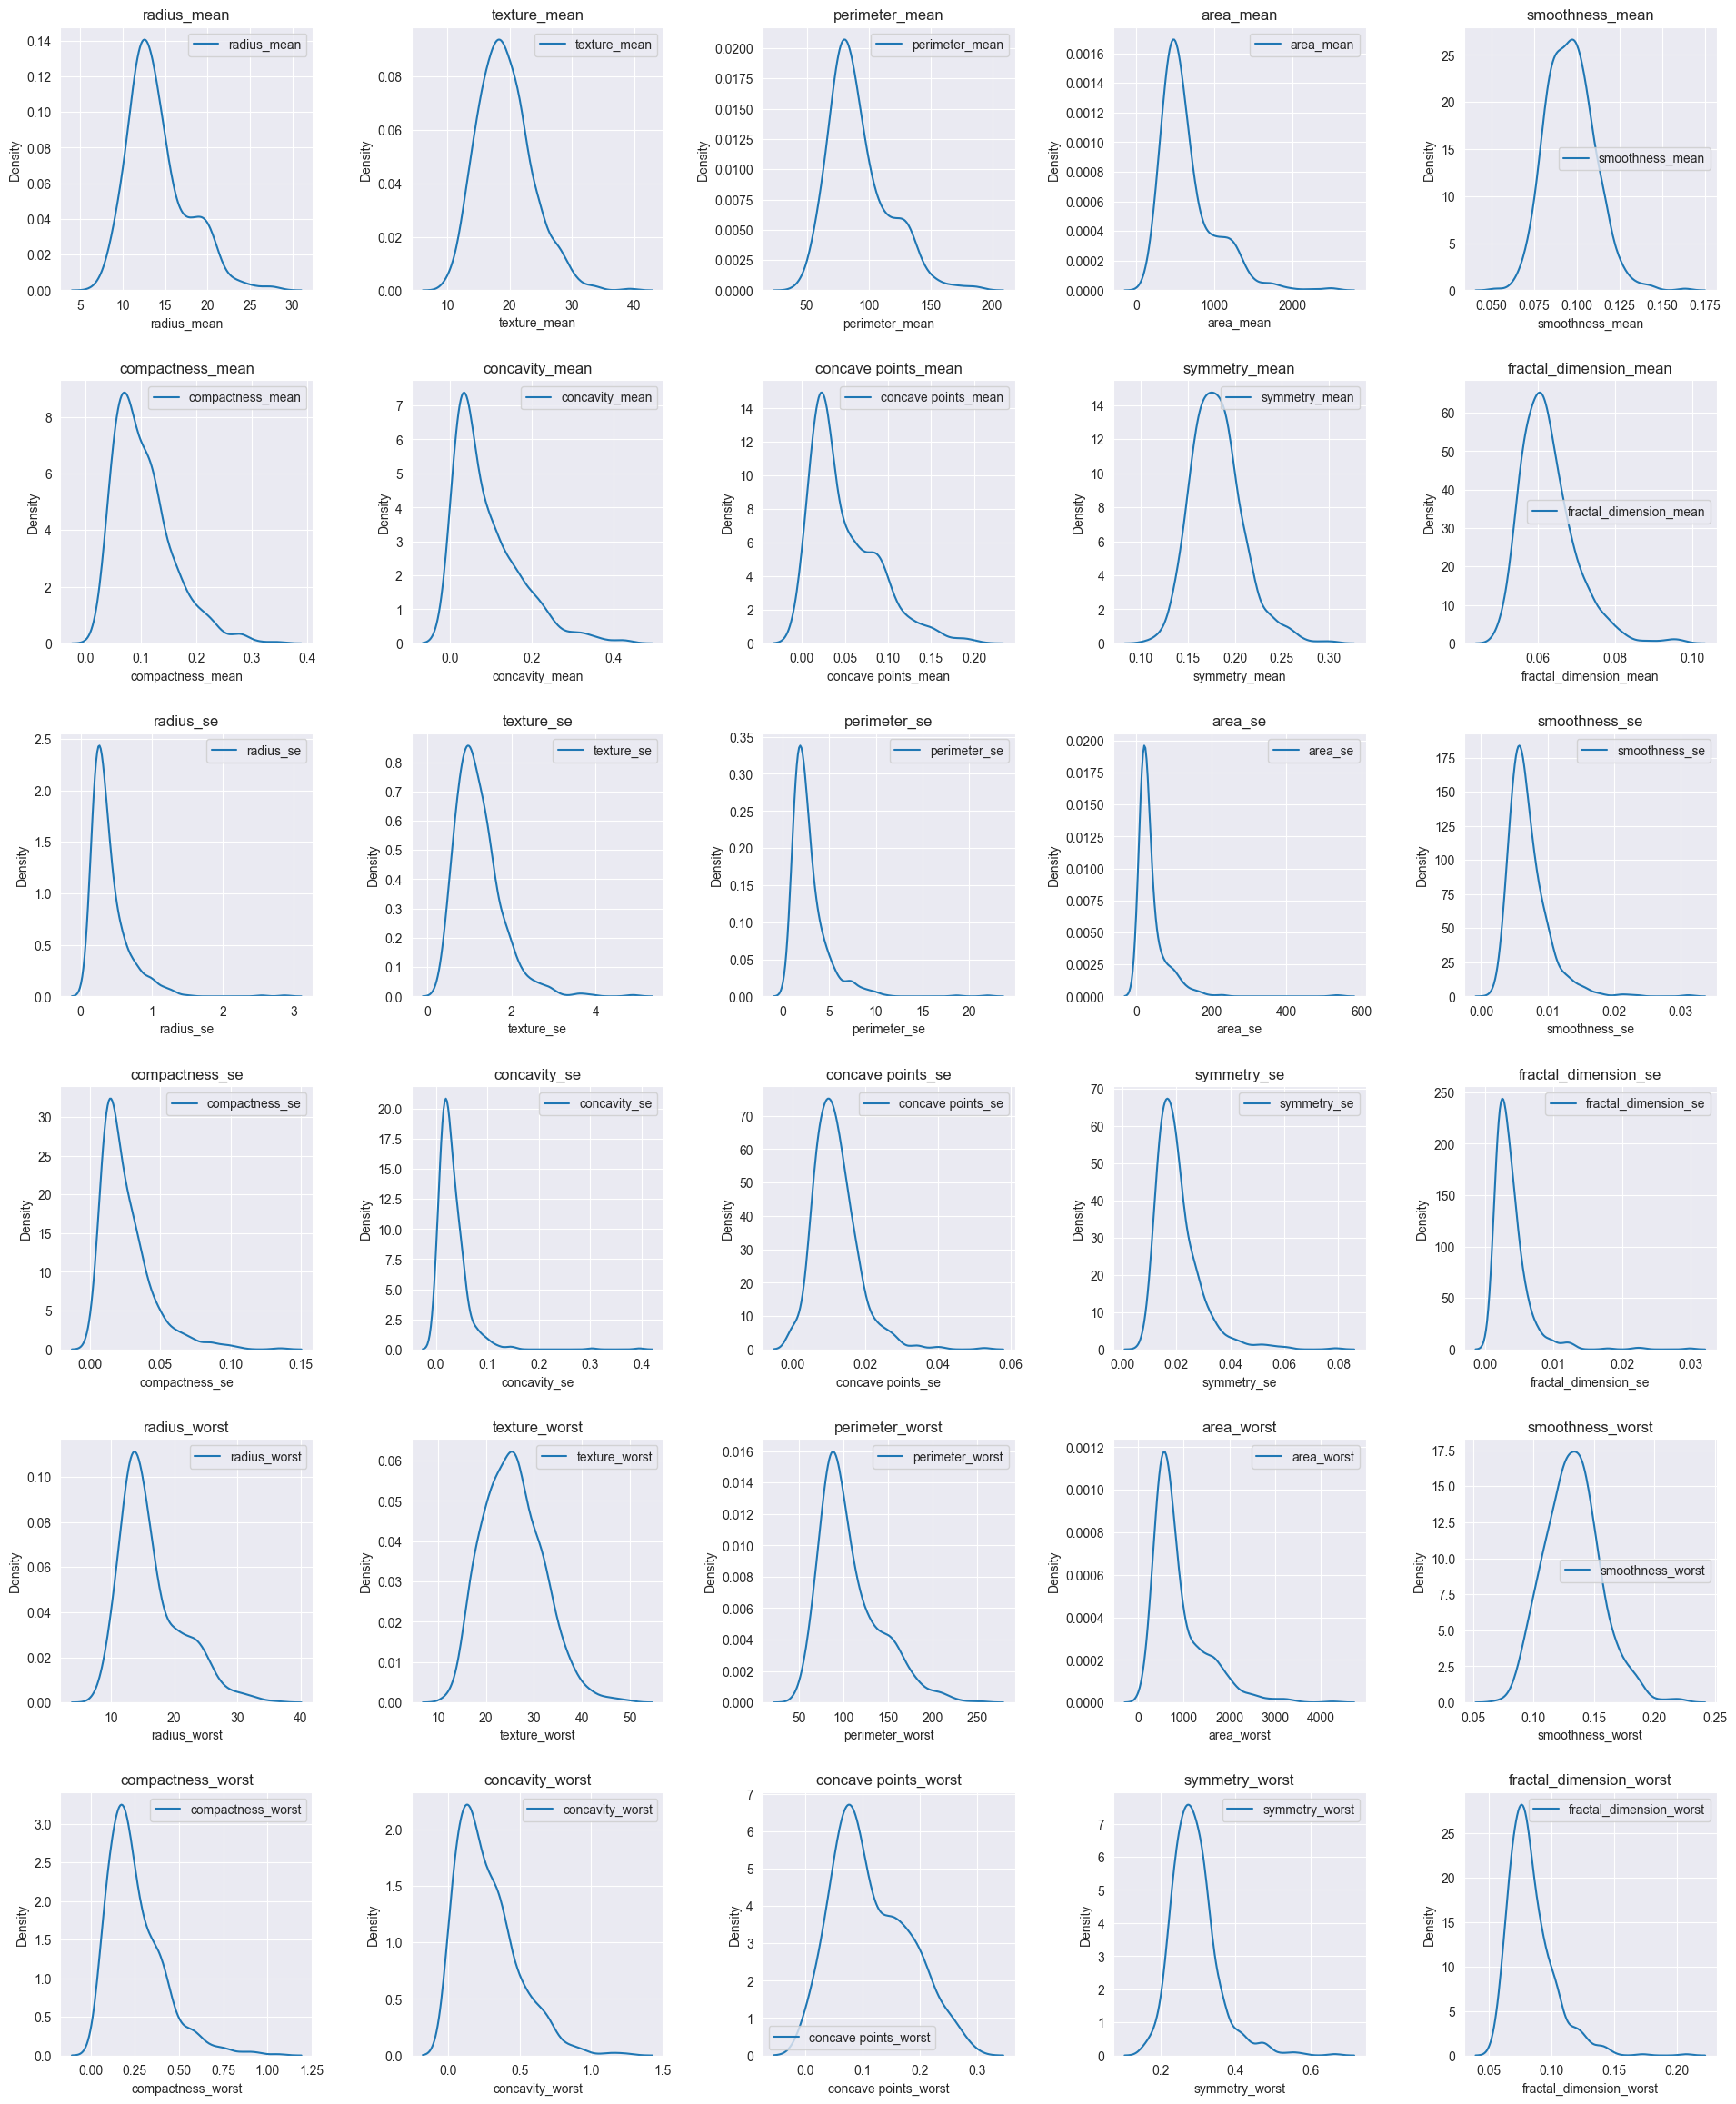

In [18]:
import math

# Distributions
num_cols = [col for col in df_raw.columns if col != "diagnosis"]

n_cols = 5
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.tight_layout(pad=5.0)

axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(df_raw[col], ax=axs[i], label=col)
    axs[i].set_title(col)
    axs[i].legend()

for j in range(len(num_cols), len(axs)):
    axs[j].axis('off')

plt.show()

<Axes: >

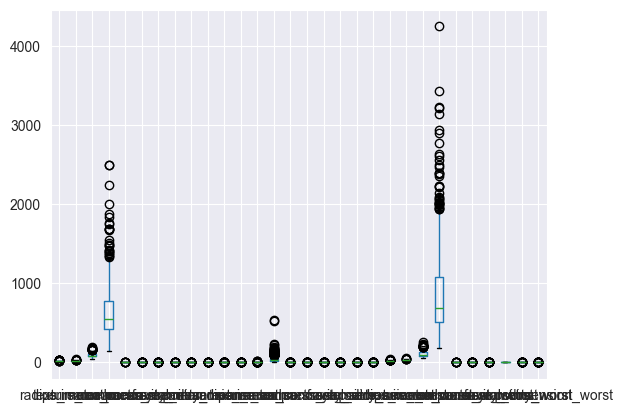

In [19]:
# Boxplot
(
    df_raw
    ### TO DO ###
    .boxplot()
)

<Axes: >

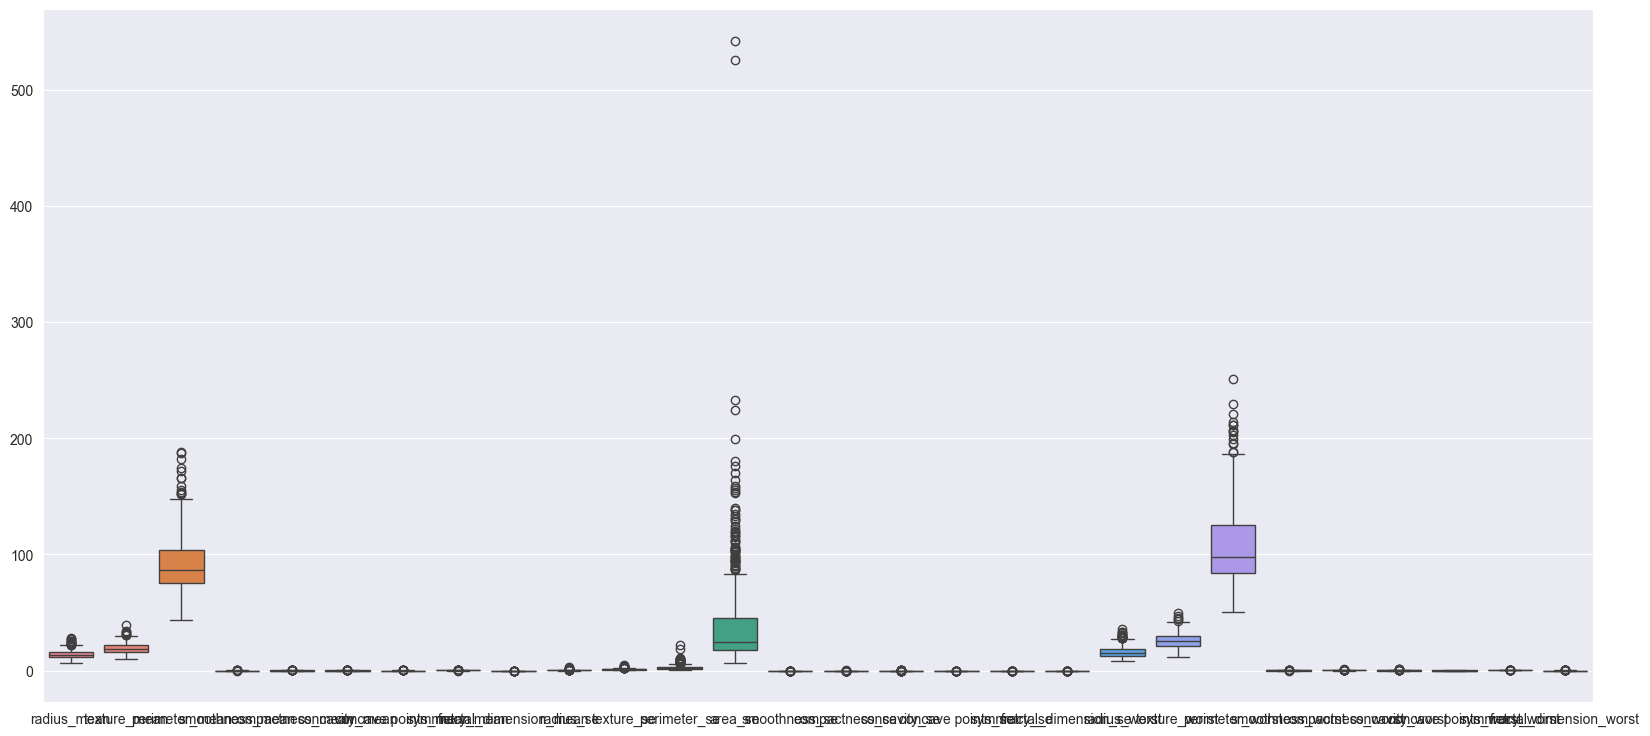

In [20]:
f, ax = plt.subplots(figsize=(20, 9))
boxplot_cols = [col for col in df_raw.columns if (col != "area_worst" and col != "area_mean")]
sns.boxplot(data=df_raw[boxplot_cols], ax=ax)

<Axes: xlabel='diagnosis'>

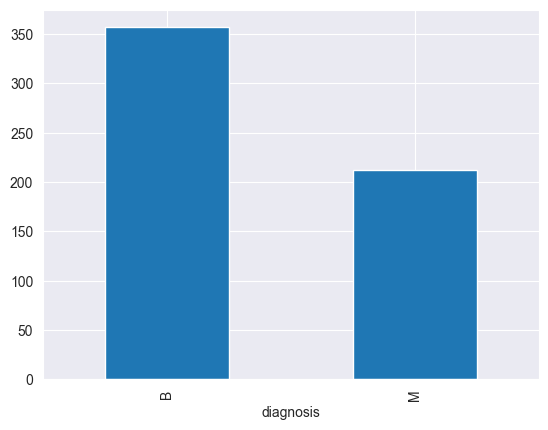

In [21]:
# Target distribution
(
    df_raw["diagnosis"]
    .value_counts()
    ### TO DO ###
    .plot.bar()
)

In [22]:
(
    df_raw["diagnosis"]
    .value_counts(
        normalize=True
    )
)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

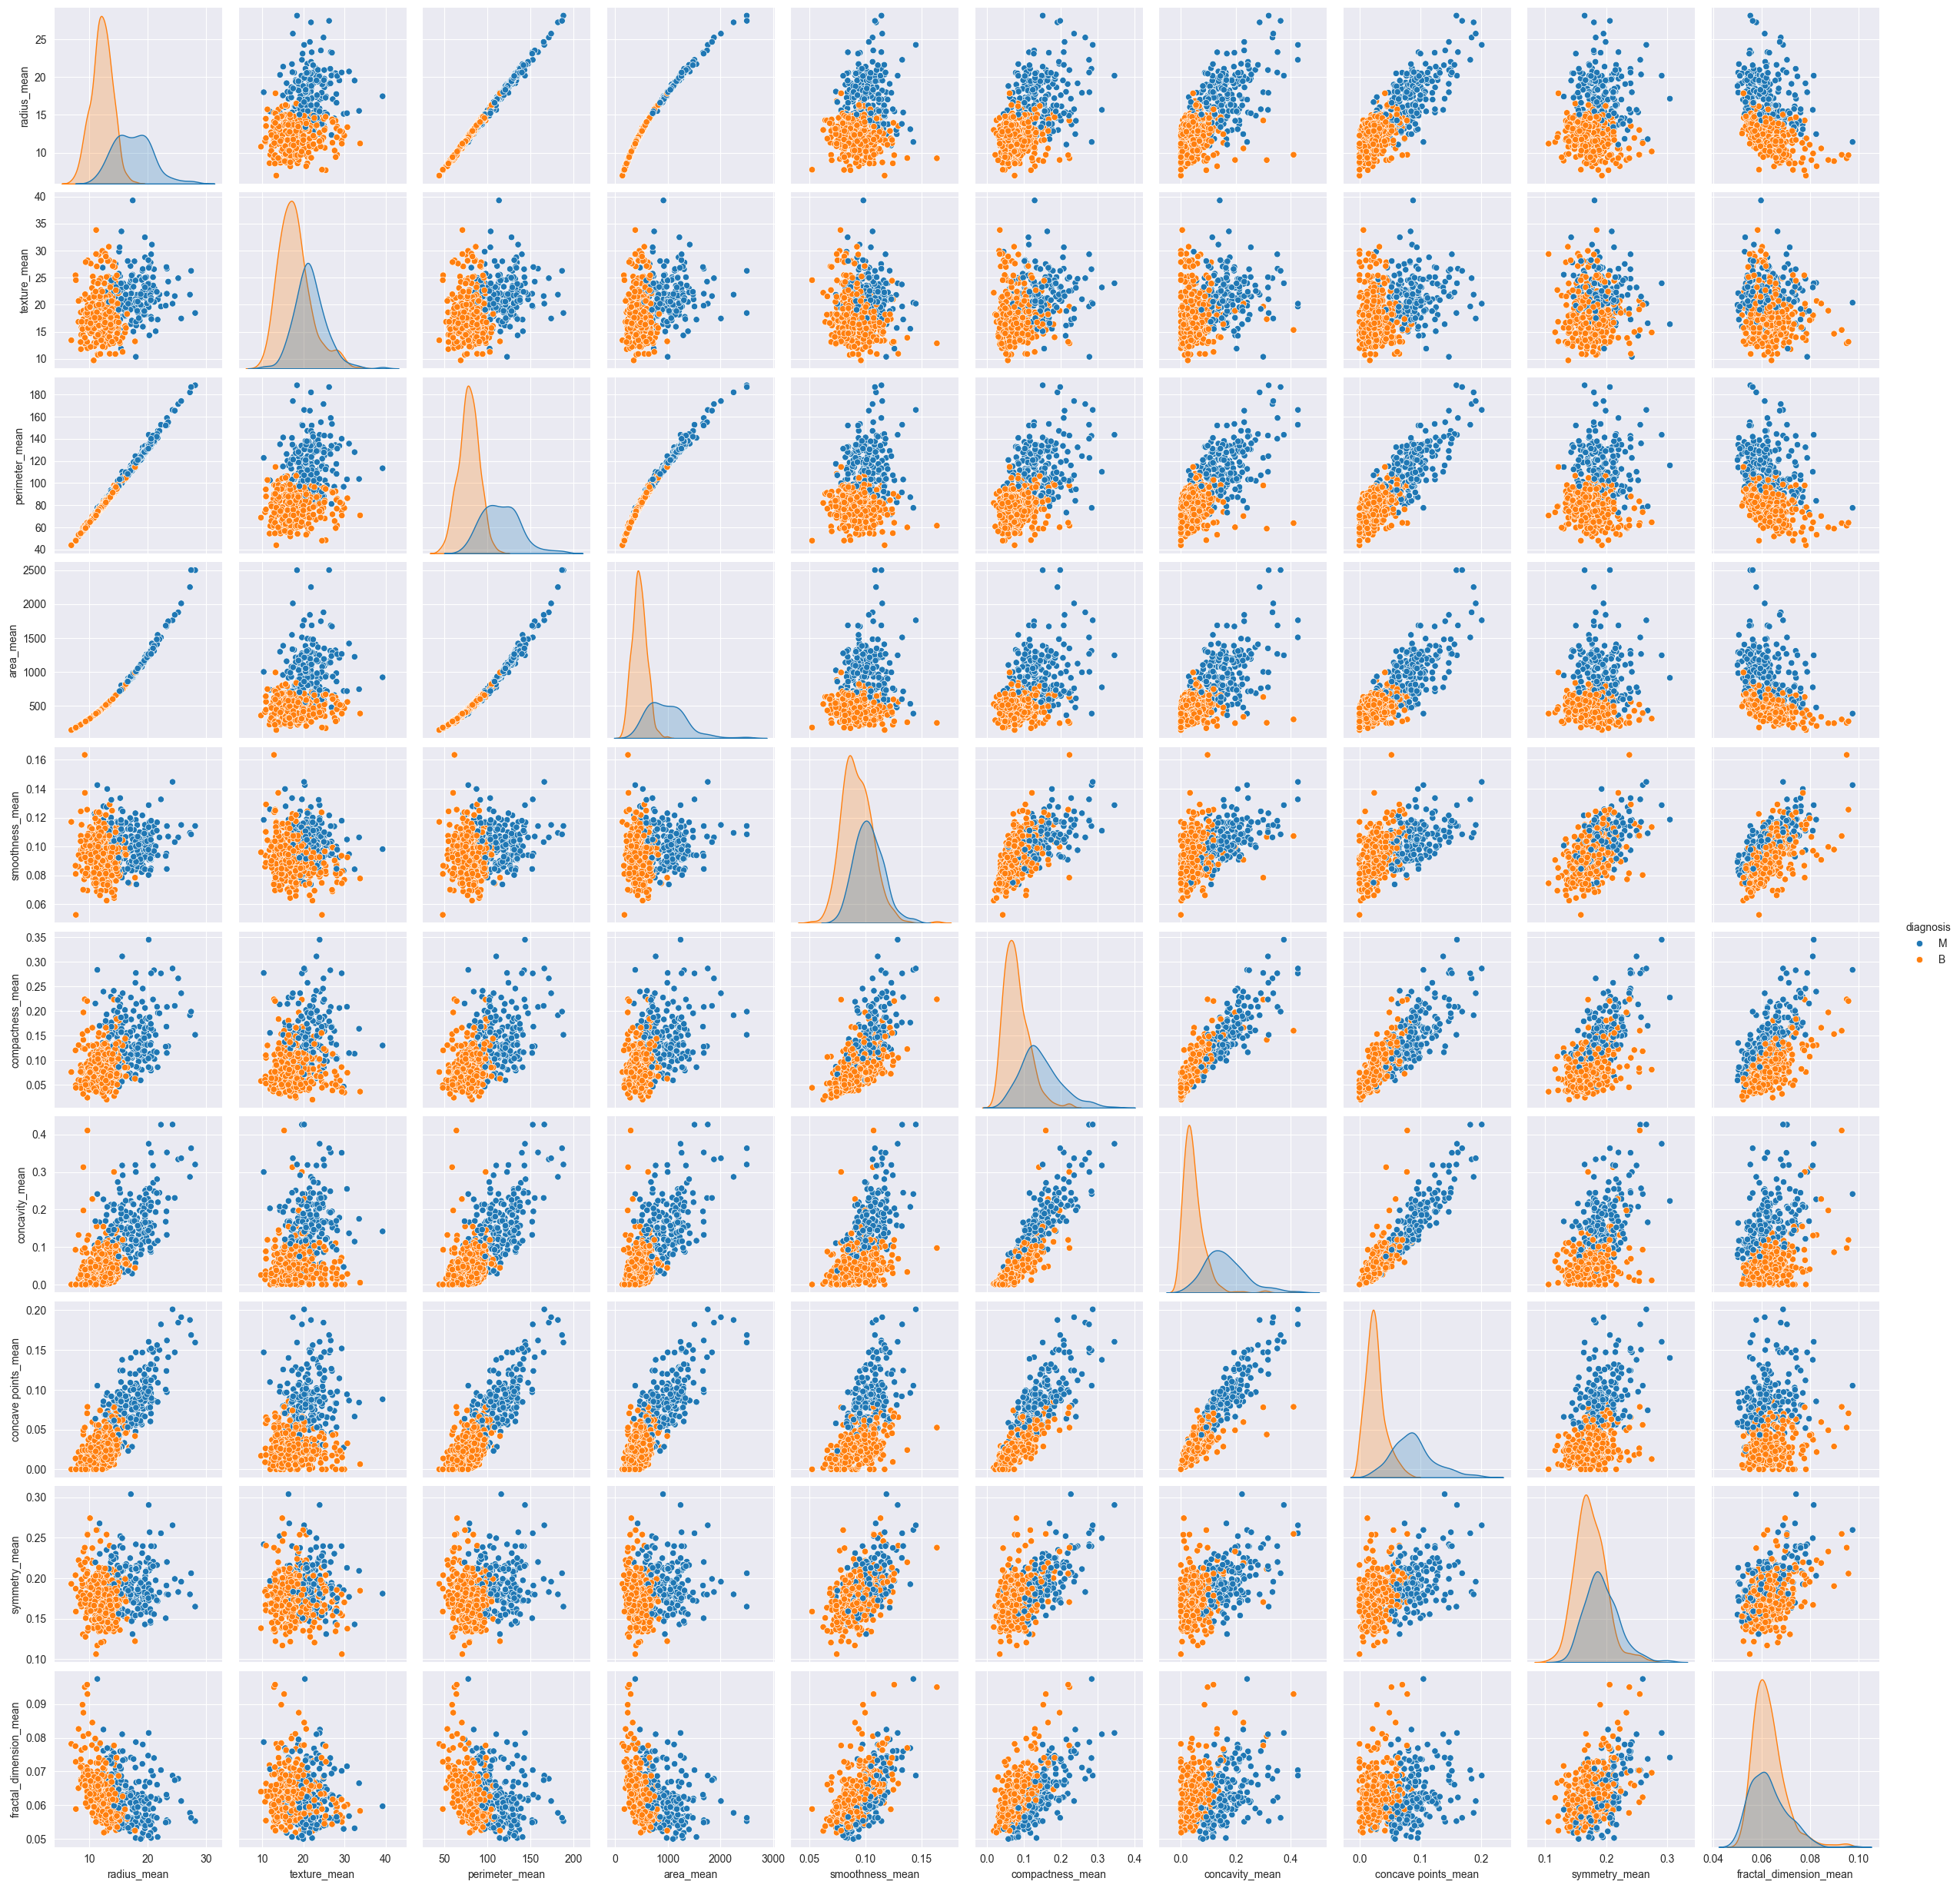

In [23]:
# Pairplot
pairplot_cols = num_cols[:10]
pairplot_cols.append("diagnosis")

sns.pairplot(
    ### TO DO ###
    df_raw[pairplot_cols],
    hue="diagnosis",
)

<Axes: >

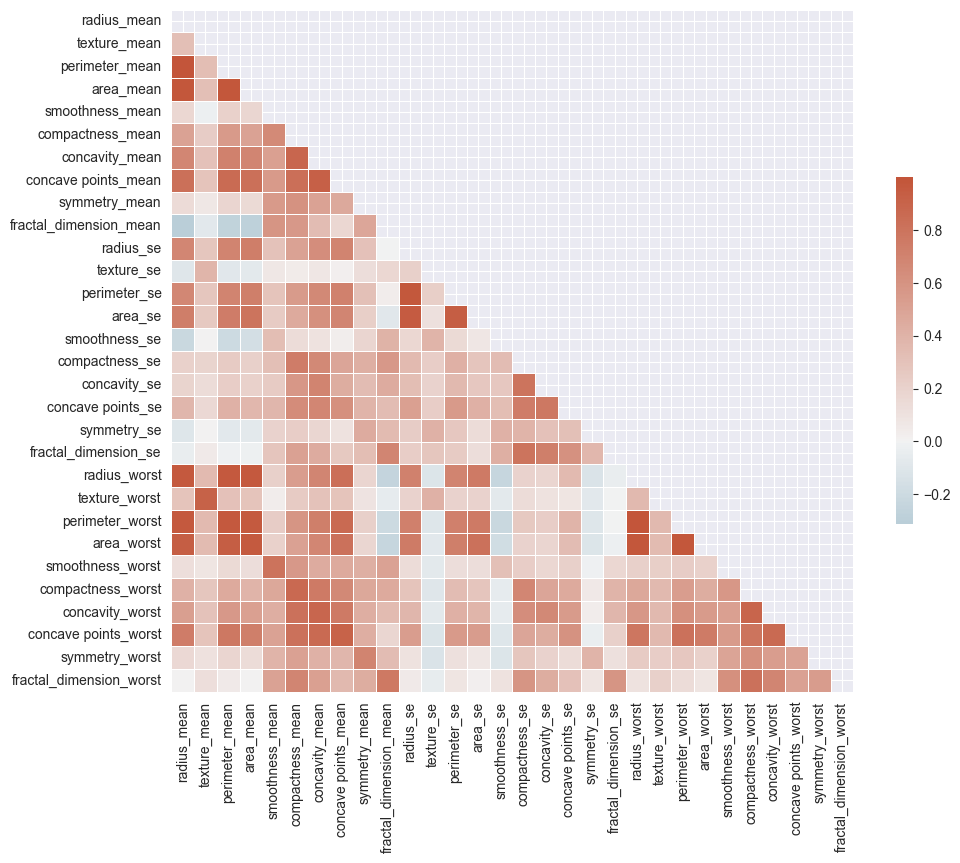

In [24]:
# Matrice de corrélation
corr = df_raw.drop("diagnosis", axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Préparation des données

### Préparation de la target

In [25]:
df_transformed = df_raw.copy()
df_transformed["diagnosis"] = (
    df_raw["diagnosis"]
    ### TO DO ###
    .map({'M': 1, 'B': 0})
)
df_transformed["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### Division du jeu de données

In [26]:
target = ["diagnosis"]
features = [col for col in df_transformed.columns if col not in target]

X_train, X_test, y_train, y_test = (
    model_selection.train_test_split(
        ### TO DO ###
        df_transformed[features],
        df_transformed[target],
        test_size=0.2,
        train_size=0.8,
        random_state=42,
    )
)

In [27]:
y_train["diagnosis"].value_counts(normalize=True)

diagnosis
0    0.628571
1    0.371429
Name: proportion, dtype: float64

### Feature Engineering

#### Outliers

In [53]:
X_train = (
    X_train
    ### TO DO ###
)

y_train = (
    y_train
    ### TO DO ###
)

#### Sélection de features

In [54]:
features_to_remove = [
    ### TO DO ###
    "perimeter_mean",
    "area_mean",
    "perimeter_se",
    "area_se",
    "perimeter_worst",
    "area_worst",
]

selected_features = [col for col in X_train.columns if col not in features_to_remove]

feature_selection = compose.ColumnTransformer(transformers=[
    ### TO DO ###
    ('select', 'passthrough', selected_features),
])

In [55]:
(
    pd.DataFrame(
        feature_selection.fit_transform(X_train),
        columns=selected_features
    )
)

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          9.029         17.33          0.10660           0.14130   
1         21.090         26.57          0.11410           0.28320   
2          9.173         13.86          0.07721           0.08751   
3         10.650         25.22          0.09657           0.07234   
4         10.170         14.88          0.11340           0.08061   
..           ...           ...              ...               ...   
450        8.888         14.64          0.09783           0.15310   
451       11.640         18.33          0.11420           0.10170   
452       14.290         16.82          0.06429           0.02675   
453       13.980         19.62          0.10600           0.11330   
454       12.180         20.52          0.08013           0.04038   

     concavity_mean  concave points_mean  symmetry_mean  \
0           0.31300              0.04375         0.2111   
1           0.24870              0.14960         0.2395   
2           0.05988              0.02180         0.2341   
3           0.02379              0.01615         0.1897   
4           0.01084              0.01290         0.2743   
..              ...                  ...            ...   
450         0.08606              0.02872         0.1902   
451         0.07070              0.03485         0.1801   
452         0.00725              0.00625         0.1508   
453         0.11260              0.06463         0.1669   
454         0.02383              0.01770         0.1739   

     fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
0                   0.08046     0.3274      1.1940  ...      0.04197   
1                   0.07398     0.6298      0.7629  ...      0.01798   
2                   0.06963     0.4098      2.2650  ...      0.04192   
3                   0.06329     0.2497      1.4930  ...      0.02158   
4                   0.06960     0.5158      1.4410  ...      0.04183   
..                      ...        ...         ...  ...          ...   
450                 0.08980     0.5262      0.8522  ...      0.02541   
451                 0.06520     0.3060      1.6570  ...      0.01565   
452                 0.05376     0.1302      0.7198  ...      0.01536   
453                 0.06544     0.2208      0.9533  ...      0.01223   
454                 0.05677     0.1924      1.5710  ...      0.01447   

     fractal_dimension_se  radius_worst  texture_worst  smoothness_worst  \
0                0.009559        10.310          22.65           0.14820   
1                0.005295        26.680          33.48           0.14910   
2                0.005822        10.010          19.23           0.09836   
3                0.002619        12.250          35.19           0.14990   
4                0.005953        11.020          17.45           0.12750   
..                    ...           ...            ...               ...   
450              0.021930         9.733          15.67           0.12070   
451              0.003840        13.140          29.26           0.16880   
452              0.001381        14.910          20.65           0.08567   
453              0.002846        17.040          30.80           0.16130   
454              0.001532        13.340          32.84           0.11230   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.43650          1.25200               0.17500          0.4228   
1              0.75840          0.67800               0.29030          0.4098   
2              0.16780          0.13970               0.05087          0.3282   
3              0.13980          0.11250               0.06136          0.3409   
4              0.09866          0.02168               0.02579          0.3557   
..                 ...              ...                   ...             ...   
450            0.24360          0.14340               0.04786          0.2254   
451            0.26600          0.28730  

#### Normalisation des features

In [56]:
pipe = pipeline.Pipeline([
    ### TO DO ###
    ("feature_selection", feature_selection),
    ("std_scaler", preprocessing.StandardScaler())
])

In [57]:
(
    pd.DataFrame(
        pipe.fit_transform(X_train),
        columns=selected_features
    )
)

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0      -1.440753     -0.435319         0.780573          0.718921   
1       1.974096      1.733026         1.319843          3.426275   
2      -1.399982     -1.249622        -1.332645         -0.307355   
3      -0.981797      1.416222         0.059390         -0.596788   
4      -1.117700     -1.010259         1.269511         -0.439002   
..           ...           ...              ...               ...   
450    -1.480675     -1.066580         0.149987          0.944057   
451    -0.701497     -0.200650         1.327033         -0.036619   
452     0.048802     -0.555001        -2.261627         -1.466613   
453    -0.038969      0.102073         0.737432          0.184701   
454    -0.548606      0.313276        -1.122689         -1.206562   

     concavity_mean  concave points_mean  symmetry_mean  \
0          2.823135            -0.119150       1.092662   
1          2.013112             2.665032       2.127004   
2         -0.365558            -0.696502       1.930333   
3         -0.820203            -0.845115       0.313264   
4         -0.983341            -0.930600       3.394436   
..              ...                  ...            ...   
450       -0.035754            -0.514485       0.331474   
451       -0.229252            -0.353247      -0.036372   
452       -1.028567            -1.105515      -1.103492   
453        0.298585             0.430059      -0.517123   
454       -0.819699            -0.804345      -0.262179   

     fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
0                  2.458173  -0.263800   -0.016052  ...     2.621166   
1                  1.558396   0.805319   -0.812687  ...    -0.317717   
2                  0.954379   0.027521    1.963060  ...     2.615041   
3                  0.074041  -0.538505    0.536473  ...     0.123299   
4                  0.950213   0.402278    0.440382  ...     2.604015   
..                      ...        ...         ...  ...          ...   
450                3.755073   0.439047   -0.647668  ...     0.592491   
451                0.339253  -0.339459    0.839530  ...    -0.603152   
452               -1.249242  -0.960991   -0.892332  ...    -0.638679   
453                0.372579  -0.640679   -0.460845  ...    -1.022118   
454               -0.831290  -0.741086    0.680610  ...    -0.747708   

     fractal_dimension_se  radius_worst  texture_worst  smoothness_worst  \
0                2.061208     -1.232861      -0.476309          0.722894   
1                0.529636      2.173314       1.311279          0.761928   
2                0.718928     -1.295284      -1.040811         -1.438693   
3               -0.431547     -0.829197       1.593530          0.796624   
4                0.765981     -1.085129      -1.334616         -0.174876   
..                    ...           ...            ...               ...   
450              6.504704     -1.352920      -1.628421         -0.469795   
451              0.007020     -0.644011       0.614731          1.616328   
452             -0.876220     -0.275720      -0.806427         -1.989065   
453             -0.350011      0.167478       0.868921          1.291049   
454             -0.821982     -0.602396       1.205642         -0.834108   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             1.186732         4.672828              0.932012        2.097242   
1             3.265601         1.928621              2.698947        1.891161   
2            -0.548564        -0.644911             -0.970239        0.597602   
3            -0.729392        -0.774950             -0.809483        0.798928   
4            -0.995079        -1.209146             -1.354582        1.033544   
..                 ...              ...                   ...             ...   
450          -0.059039        -0.627221             -1.016366       -1.032028   
451           0.085623         0.060743  

## Entraînement d'un arbre de décision

In [58]:
# Définition du pipeline
pipe = pipeline.Pipeline([
    ### TO DO ###
    ("feature_selection", feature_selection),
    ("std_scaler", preprocessing.StandardScaler()),
    ("decision_tree", tree.DecisionTreeClassifier())

])

In [59]:
# Entraînement du pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 ColumnTransformer(transformers=[('select', 'passthrough',
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('std_scaler', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())])

## Evaluation

L'arbre de décision est maintenant entraîné.
Pour mesurer sa performance, vous pouvez calculer son **accuracy**.

Sklearn fournit également la fonction ``plot_tree`` qui permet d'afficher la structure de l'arbre.

In [60]:
y_train

diagnosis
68           0
181          1
63           0
248          0
60           0
..         ...
71           0
106          0
270          0
435          1
102          0

[455 rows x 1 columns]

In [61]:
pipe.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [37]:
# Calcul de l'accuracy

print(
    "Accuracy on train set =",
    ### TO DO ###
    pipe.score(X_train, y_train)
)
print(
    "Accuracy on test set =",
    ### TO DO ###
    pipe.score(X_test, y_test)
)

Accuracy on train set = 1.0
Accuracy on test set = 0.9298245614035088


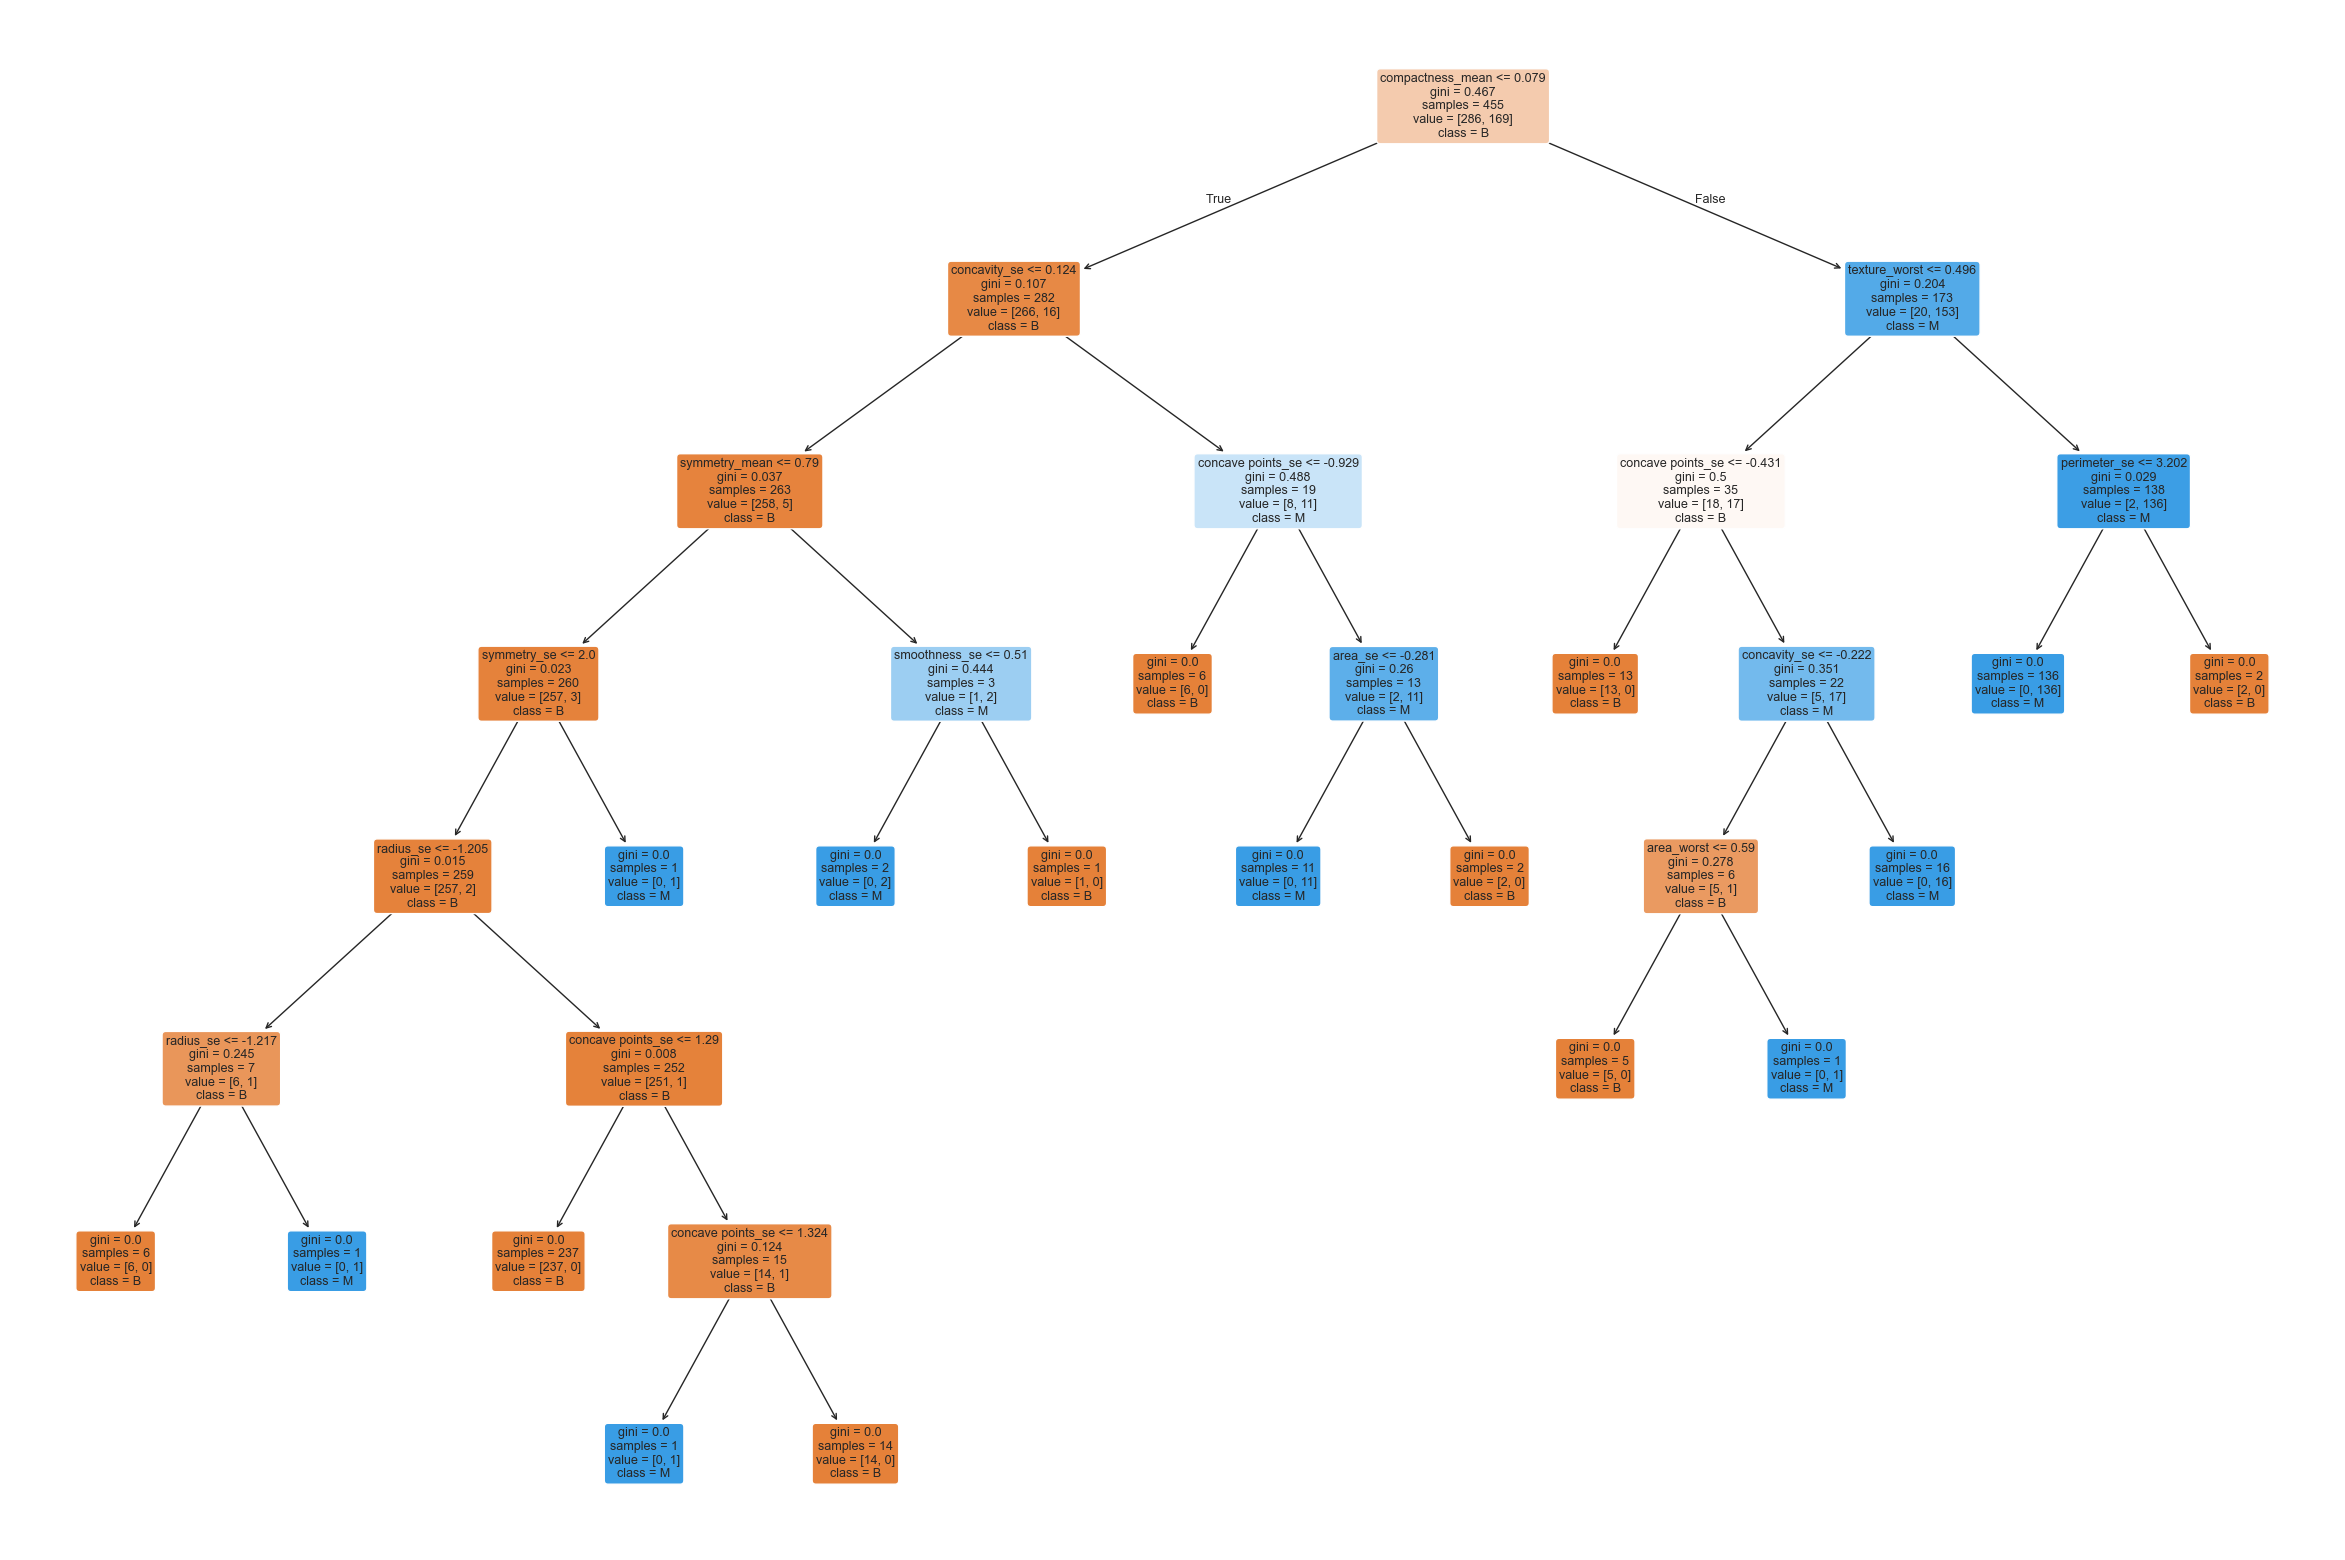

In [38]:
plt.figure(figsize=(30, 20))
tree.plot_tree(
    pipe[-1],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names=["B", "M"],
    fontsize=9
)
plt.savefig("tree_raw.png", bbox_inches="tight")

La **matrice de confusion** donne plus d'information sur les forces et les faiblesses du modèle.

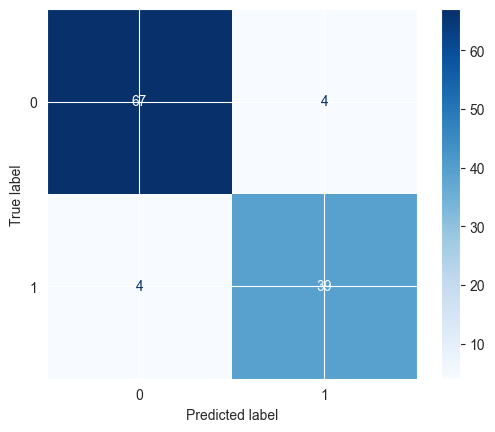

In [39]:
# MAtrice de confusion

metrics.ConfusionMatrixDisplay.from_predictions(
    ### TO DO ###
    y_test,
    pipe.predict(X_test),
    cmap="Blues"
)

Sklearn fournit également un rapport de classification avec de nombreuses métriques calculées.

In [40]:
print(metrics.classification_report(
    ### TO DO ###
    y_train,
    pipe.predict(X_train),
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [41]:
print(metrics.classification_report(
    ### TO DO ###
    y_test,
    pipe.predict(X_test),
))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Nous avons entraîné un arbre de décision avec ses paramètres par défaut: Il n'y a pas de containte sur la **profondeur** de l'arbre

Modifions quelques paramètres pour voir leur influence :
- `max_depth`
- `max_lead_nodes`

In [42]:
pipe = pipeline.Pipeline([
    ("feature_selection", feature_selection),
    ('std_scaler', preprocessing.StandardScaler()),
    (
        'decision_tree',
        tree.DecisionTreeClassifier(
            ### TO DO ###
            max_depth=3,
            max_leaf_nodes=5,
        )
    )]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 ColumnTransformer(transformers=[('select', 'passthrough',
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('std_scaler', StandardScaler()),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5))])

Accuracy on train set = 0.9560439560439561
Accuracy on test set = 0.9473684210526315


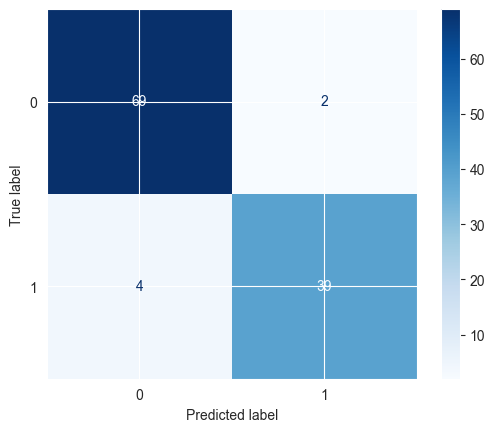

In [43]:
print("Accuracy on train set =", pipe.score(X_train, y_train))
print("Accuracy on test set =", pipe.score(X_test, y_test))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test), cmap="Blues")

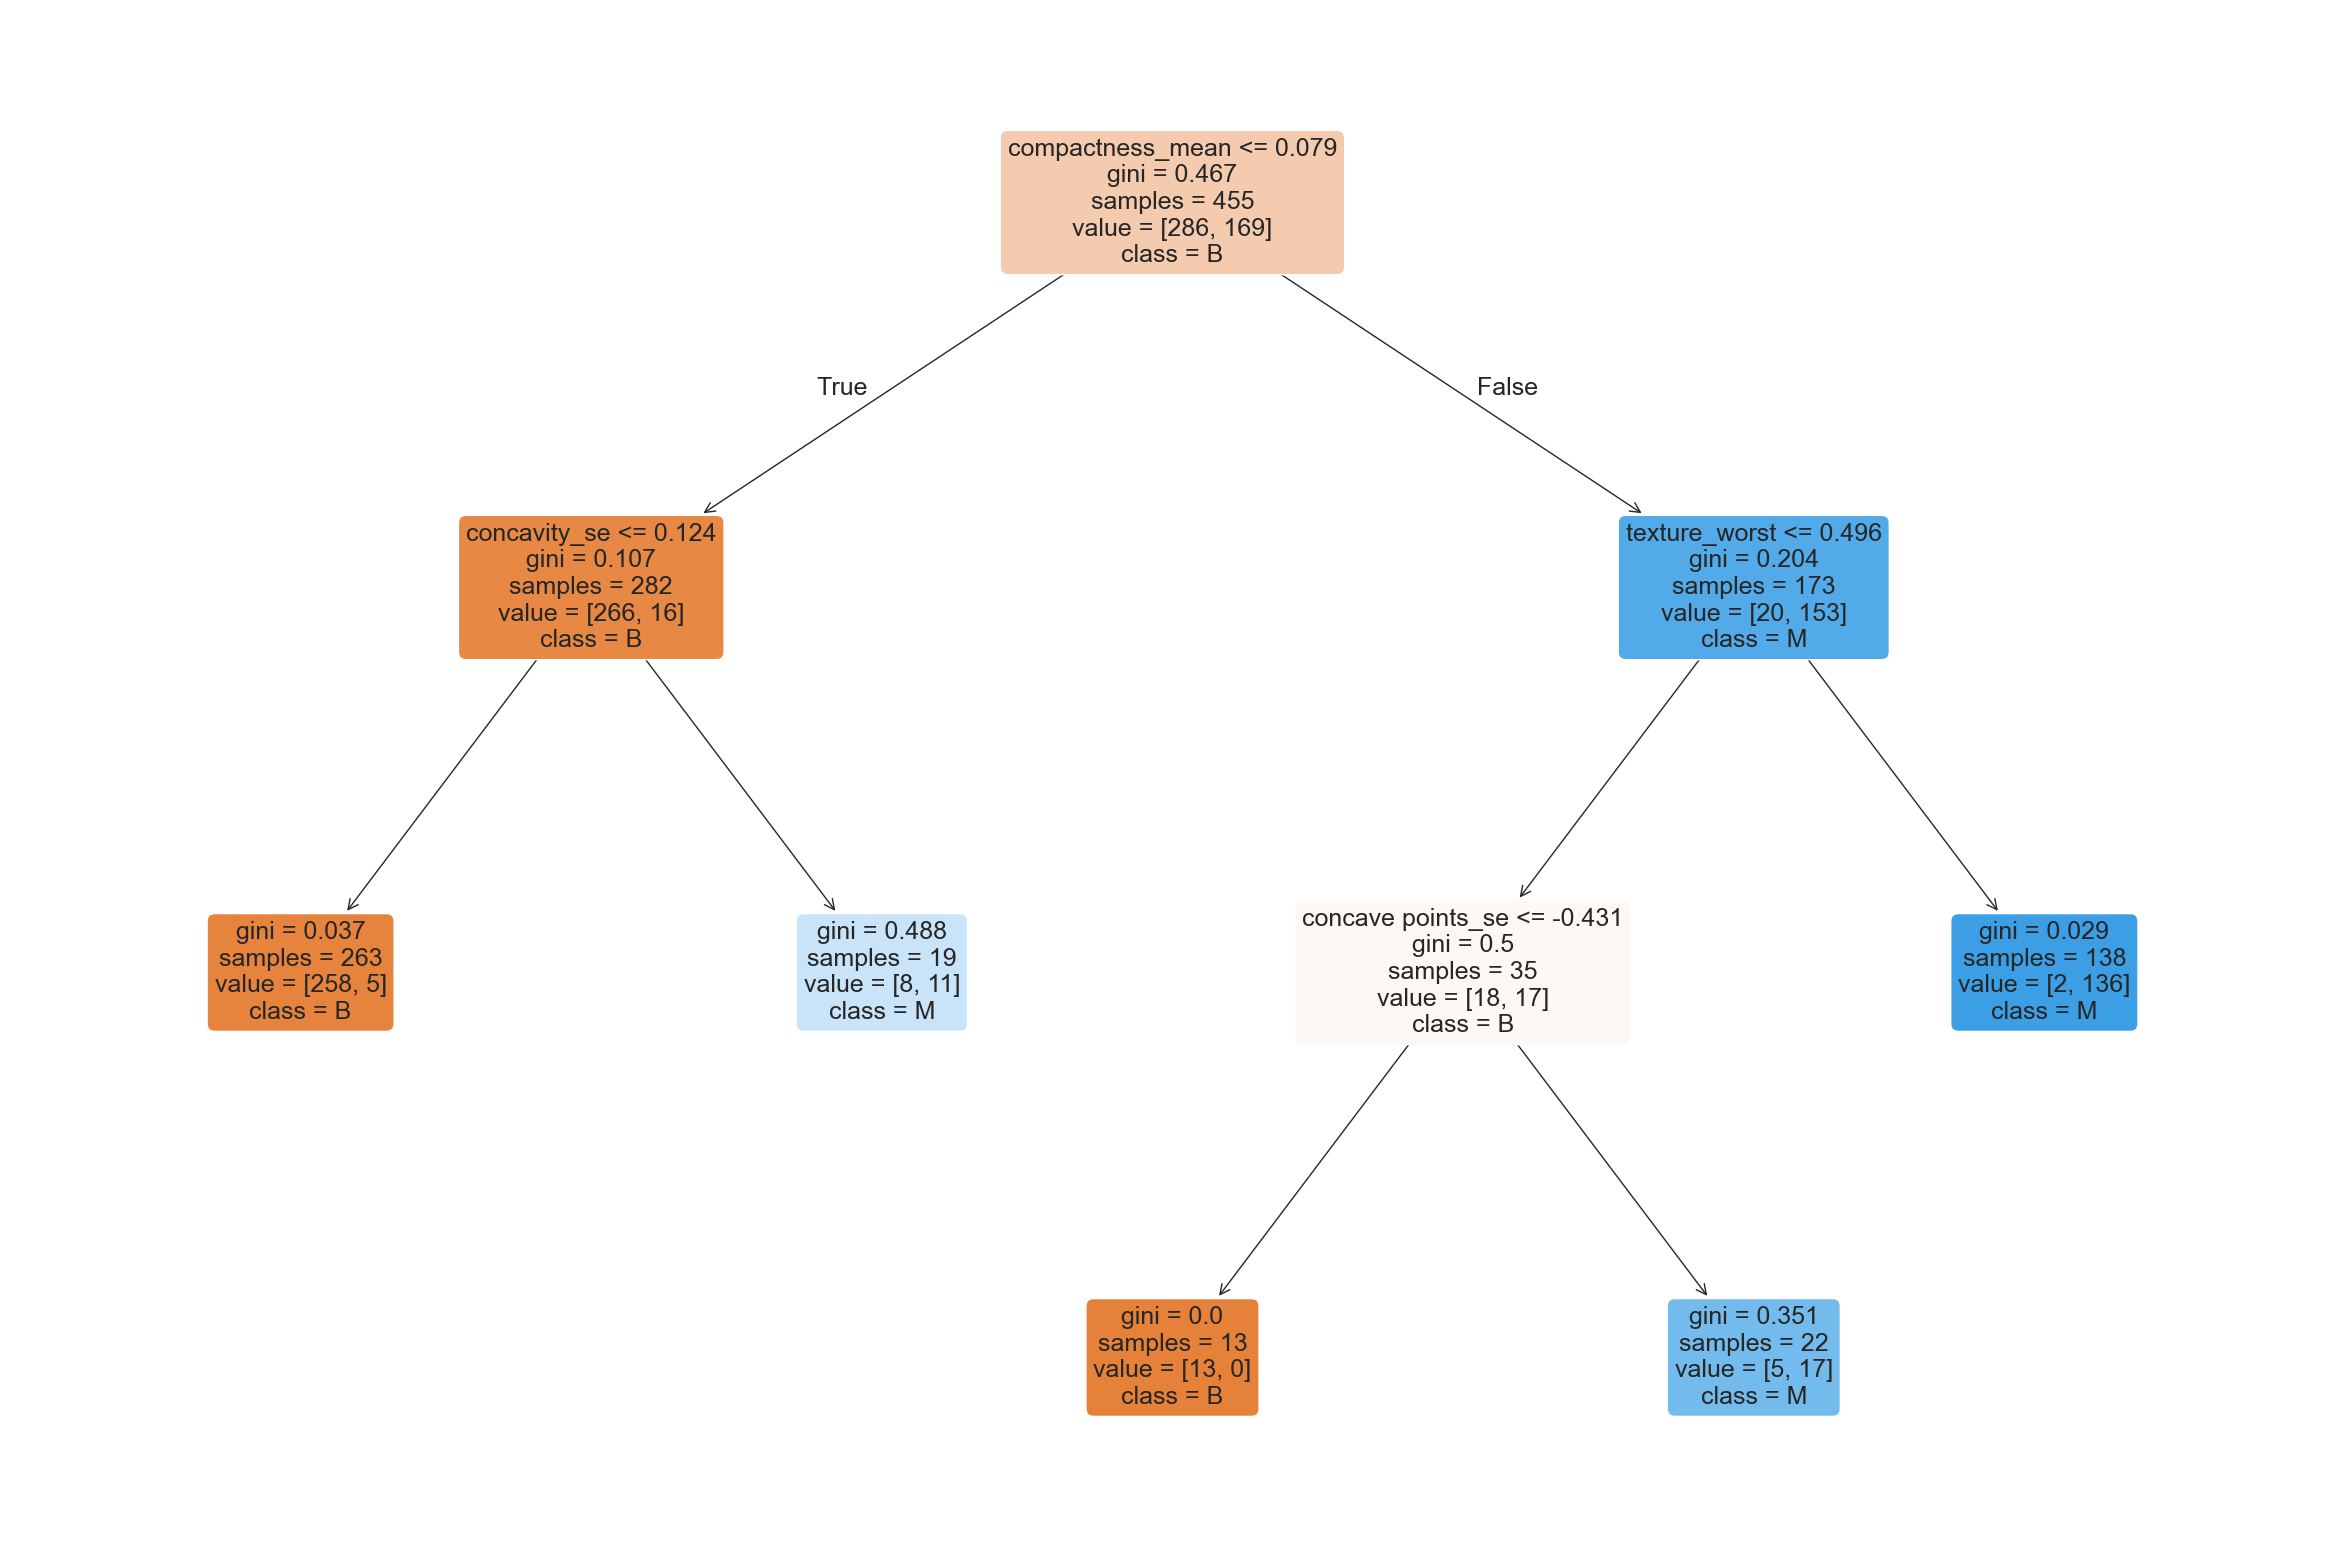

In [44]:
plt.figure(figsize=(30, 20))
tree.plot_tree(
    pipe[-1],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    class_names=["B", "M"],
    fontsize=18
)
plt.savefig("tree_hp.png", bbox_inches="tight")

In [45]:
print(metrics.classification_report(y_train, pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       286
           1       0.92      0.97      0.94       169

    accuracy                           0.96       455
   macro avg       0.95      0.96      0.95       455
weighted avg       0.96      0.96      0.96       455



In [46]:
print(metrics.classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



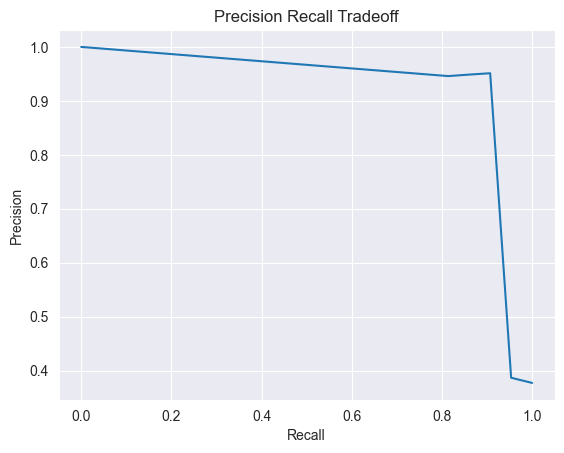

In [47]:
precision, recall, threshold = (
    metrics.precision_recall_curve(
        y_test,
        pipe.predict_proba(X_test)[:, 1]
    )
)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

### Réseau de neurones

In [182]:
pipe = pipeline.Pipeline([
    ("feature_selection", feature_selection),
    ("std_scaler", preprocessing.StandardScaler()),
    ### TO DO ###
    ("neural_network", neural_network.MLPClassifier(hidden_layer_sizes=(12,24), random_state=42)),
])

pipe.fit(X_train, y_train)

/Users/lpreaux/projects/2024D10-intro-ia/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lpreaux/projects/2024D10-intro-ia/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 ColumnTransformer(transformers=[('select', 'passthrough',
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('std_scaler', StandardScaler()),
                ('neural_network',
                 MLPClassifier(hidden_layer_sizes=(12, 24), random_state=42))])

Accuracy on train set = 0.9934065934065934
Accuracy on test set = 0.9649122807017544


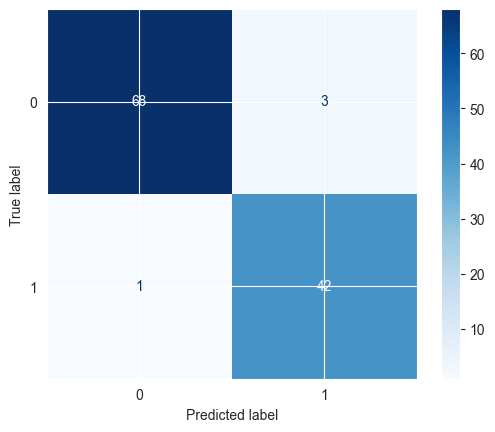

In [183]:
print("Accuracy on train set =", pipe.score(X_train, y_train))
print("Accuracy on test set =", pipe.score(X_test, y_test))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test), cmap="Blues")

In [69]:
print(metrics.classification_report(y_train, pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [70]:
print(metrics.classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



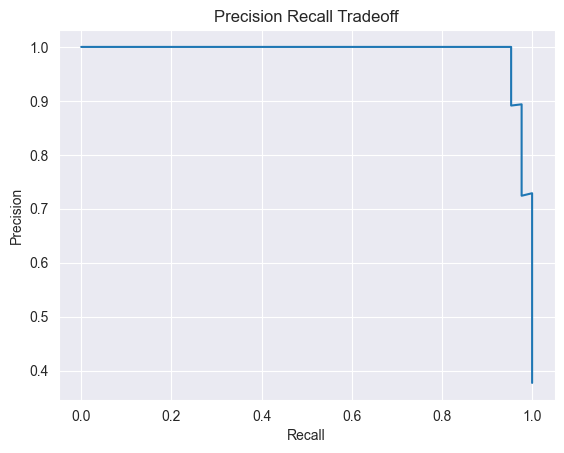

In [71]:
precision, recall, threshold = (
    metrics.precision_recall_curve(
        y_test,
        pipe.predict_proba(X_test)[:, 1]
    )
)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

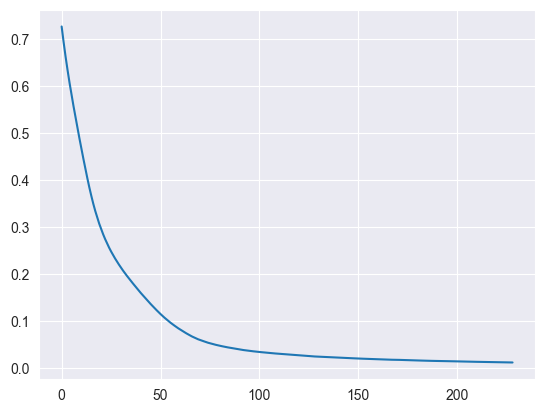

In [163]:
plt.plot(pipe[-1].loss_curve_)
plt.show()